In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import clock, time
from datetime import datetime

from sklearn import metrics  
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential, load_model, model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

%matplotlib inline

from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale, label_binarize
from sklearn.svm import SVC

Using TensorFlow backend.


In [3]:
plt.rcParams["font.size"] = 30
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.titlesize'] = 20
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 10

In [4]:
BASE_DIR = "."
DEBUG = False

np.random.seed(42)

In [5]:
df=pd.read_csv('train.csv')
X_test=pd.read_csv('test.csv')

In [6]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [7]:
df.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

### FEATURE ENGINEERING

In [559]:
#df['var_200']=df['var_81']+df['var_139']

In [560]:
#df['var_201']=df['var_81']+df['var_12']+df['var_139']

In [561]:
#df['var_202']=df['var_81']+df['var_12']

In [562]:
#X_test['var_200']=df['var_81']+df['var_139']

In [563]:
#X_test['var_201']=df['var_81']+df['var_12']+df['var_139']

In [564]:
#X_test['var_202']=df['var_81']+df['var_12']

In [8]:
df.shape

(200000, 202)

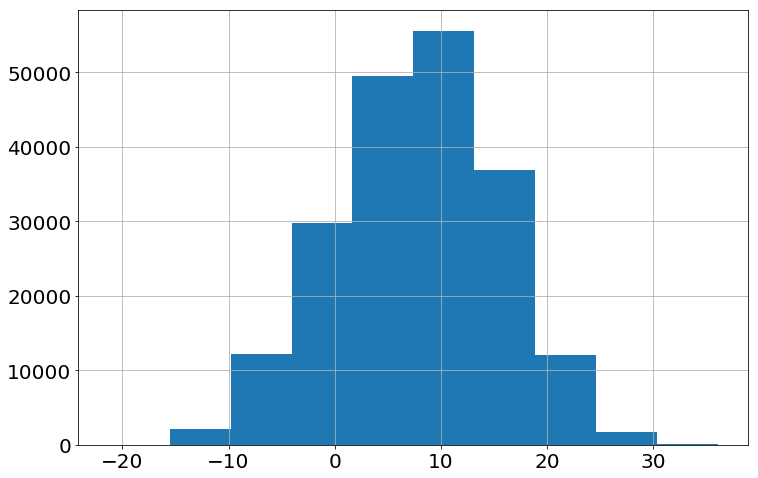

In [9]:
df['var_139'].hist()

In [10]:
df.head(2)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [11]:
X = df.loc[:,'var_0':]
y = df["target"]

In [12]:
#X, X_hideout, y, y_hideout = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#df=X.join(y)

In [14]:
df.head(2)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [15]:
# Class count
count_class_0, count_class_1 = df.target.value_counts()

# Divide by class
df_class_0 = df[df['target'] == 0]
df_class_1 = df[df['target'] == 1]

Random over-sampling:
1    179902
0    179902
Name: target, dtype: int64


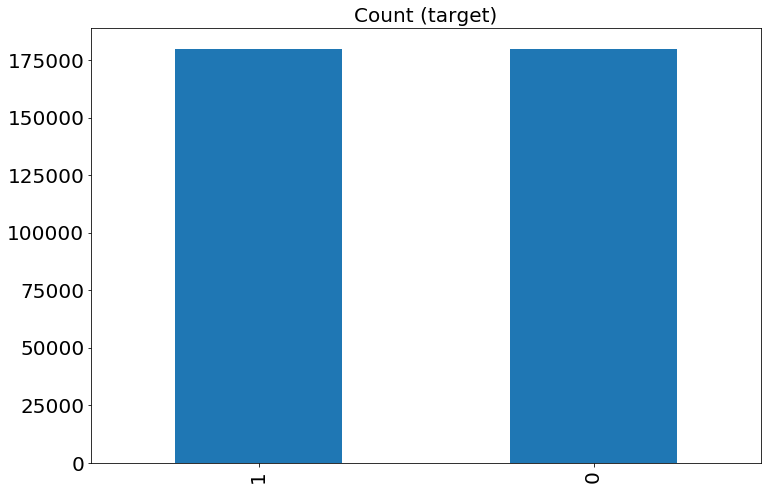

In [16]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_sampled = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_sampled.target.value_counts())

df_sampled.target.value_counts().plot(kind='bar', title='Count (target)');

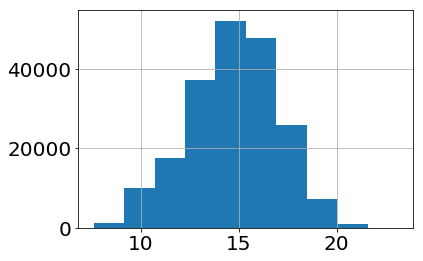

In [555]:
df['var_81'].hist()

In [354]:
df.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
count,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,...,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,10.682738,-1.627696,10.717273,6.798320,11.077072,-5.064404,5.407761,16.546935,0.279438,7.569171,...,7.436819,1.926654,3.329032,18.001276,-0.143144,2.306358,8.908255,15.865846,-3.336450,0.100006
std,3.038333,4.048081,2.638754,2.047802,1.623799,7.869306,0.865952,3.419036,3.331505,1.235113,...,3.023273,1.478095,3.994579,3.136101,1.429952,5.457679,0.920898,3.012891,10.438205,0.300009
min,0.452800,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,6.047600,6.558700,-38.852800,0.000000
25%,8.457575,-4.739725,8.725700,5.250900,9.881500,-11.184125,4.766200,13.943350,-2.322850,6.620600,...,5.156450,0.887700,0.581100,15.630100,-1.172500,-1.953225,8.254700,13.817800,-11.219150,0.000000
50%,10.528250,-1.602700,10.585100,6.827800,11.106500,-4.832200,5.382400,16.458900,0.383400,7.631450,...,7.348150,1.900900,3.398850,17.968600,-0.175300,2.418250,8.887600,15.928800,-2.850100,0.000000
75%,12.757700,1.355125,12.516800,8.330000,12.259900,0.927800,6.000900,19.103125,2.933300,8.587725,...,9.510800,2.949025,6.204100,20.407225,0.829800,6.566325,9.593000,18.061100,4.828825,0.000000
max,20.315000,10.376800,18.652100,13.188300,16.671400,17.251600,8.355600,27.691800,10.151300,11.150600,...,16.684600,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,27.534000,1.000000


In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Columns: 201 entries, var_0 to target
dtypes: float64(200), int64(1)
memory usage: 245.4 MB


In [17]:
df_sampled.target.value_counts()

1    179902
0    179902
Name: target, dtype: int64

## Lets do some exploration and feature engineering

In [19]:
df_sampled.corr()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.083419,0.083561,0.087720,0.018193,0.017449,0.051112,0.108662,-0.002593,0.033858,...,9.126541e-02,0.076220,-0.070889,-0.028191,-0.040045,0.046918,0.038549,-0.058308,-0.083890,0.040070
var_0,0.083419,1.000000,0.001021,0.012386,0.008586,0.006596,0.005766,0.010562,-0.000971,0.006016,...,6.385610e-03,0.005718,-0.005664,-0.005046,-0.005807,0.004340,0.003838,-0.003992,-0.006098,0.009789
var_1,0.083561,0.001021,1.000000,0.011332,0.001972,0.002867,-0.002280,0.008913,0.008092,0.003501,...,1.253398e-02,0.009018,-0.001187,-0.001092,-0.007958,-0.000702,-0.002071,-0.009606,-0.012990,0.005806
var_2,0.087720,0.012386,0.011332,1.000000,0.002539,0.003555,0.003086,0.011262,0.004198,0.004332,...,4.374868e-03,0.005882,-0.013605,-0.001111,-0.007212,-0.001616,0.003009,-0.003177,-0.004171,0.007662
var_3,0.018193,0.008586,0.001972,0.002539,1.000000,-0.002765,0.006603,0.000176,-0.000147,0.001679,...,-1.217007e-03,0.008570,0.000789,-0.000930,-0.002479,0.003477,-0.000057,-0.002241,-0.002230,0.001306
var_4,0.017449,0.006596,0.002867,0.003555,-0.002765,1.000000,-0.000595,0.004393,0.005859,0.002593,...,2.237836e-03,0.009336,0.008003,0.002475,-0.004314,0.001345,0.002787,0.003158,-0.005554,-0.003492
var_5,0.051112,0.005766,-0.002280,0.003086,0.006603,-0.000595,1.000000,0.005161,0.002835,0.002835,...,1.131758e-03,0.000024,-0.005325,-0.008203,-0.000358,0.003356,0.004801,-0.006200,-0.007963,-0.006074
var_6,0.108662,0.010562,0.008913,0.011262,0.000176,0.004393,0.005161,1.000000,-0.003857,0.003070,...,1.779346e-03,0.008477,-0.013998,0.002509,-0.003993,0.005823,0.006375,-0.004496,-0.006201,0.008027
var_7,-0.002593,-0.000971,0.008092,0.004198,-0.000147,0.005859,0.002835,-0.003857,1.000000,0.006212,...,2.023895e-03,-0.006646,0.002303,0.004640,-0.001024,0.000538,-0.000211,0.009482,-0.001114,0.000652
var_8,0.033858,0.006016,0.003501,0.004332,0.001679,0.002593,0.002835,0.003070,0.006212,1.000000,...,7.164416e-04,-0.001579,-0.002865,0.001433,0.001976,0.001534,0.003059,-0.008660,0.006066,0.001059


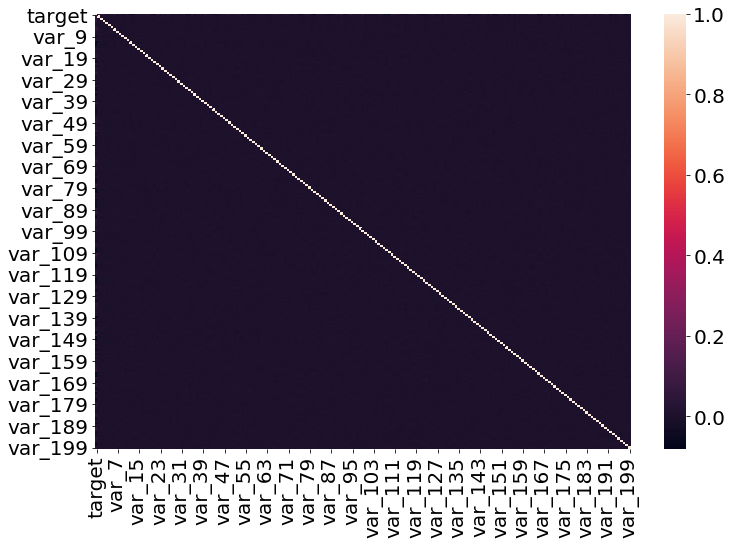

In [20]:
sns.heatmap(df_sampled.corr())

## 3. feature selection, removing unnecessary features

In [21]:
df_sampled1=df_sampled.drop('target', axis=1)

In [22]:
df_sampled.shape

(359804, 202)

In [23]:
df_sampled1.head(2)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


### CV 5 fold, then model apply

lets seperate target and features

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

from sklearn import model_selection

from sklearn.model_selection import StratifiedShuffleSplit

In [50]:
X = df_sampled.loc[:,'var_0':]
y = df_sampled["target"]

In [26]:
X.shape, y.shape

((359804, 200), (359804,))

In [14]:
df_sampled["target"].value_counts()

1    179902
0    179902
Name: target, dtype: int64

##  Bayesian Optimization, Model Implementation

In [ ]:
import skopt

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.callbacks import DeadlineStopper # Stop the optimization before running out of a fixed budget of time.
from skopt.callbacks import VerboseCallback # Callback to control the verbosity
from skopt.callbacks import DeltaXStopper # Stop the optimization If the last two positions at which the objective has been evaluated are less than delta

from sklearn.metrics import make_scorer
from sklearn.metrics import average_precision_score, roc_auc_score, mean_absolute_error

import pprint


In [ ]:
import datetime as dt
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
# Reporting util for different optimizers
def report_perf(optimizer, X, y, title, callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    best_score = optimizer.best_score_
    best_score_std = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start, 
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

In [ ]:
# Setting a 5-fold stratified cross-validation (note: shuffle=True)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
# Converting average precision score into a scorer suitable for model selection
avg_prec = make_scorer(average_precision_score, greater_is_better=True, needs_proba=True)

In [ ]:
clf = lgb.LGBMClassifier(boosting_type='gbdt',
                         class_weight='balanced',
                         objective='binary',
                         n_jobs=1, 
                         verbose=0)

search_spaces = {
        'learning_rate': Real(0.01, 1.0, 'log-uniform'),
        'num_leaves': Integer(2, 50),
        'max_depth': Integer(0, 20),
        'min_child_samples': Integer(0, 200),
        'max_bin': Integer(100, 100000),
        'subsample': Real(0.01, 1.0, 'uniform'),
        'subsample_freq': Integer(0, 10),
        'colsample_bytree': Real(0.01, 1.0, 'uniform'),
        'min_child_weight': Integer(0, 10),
        'subsample_for_bin': Integer(100000, 500000),
        'reg_lambda': Real(1e-9, 1000, 'log-uniform'),
        'reg_alpha': Real(1e-9, 1.0, 'log-uniform'),
        'scale_pos_weight': Real(1e-6, 500, 'log-uniform'),
        'n_estimators': Integer(500, 2000)        
        }

opt = BayesSearchCV(clf,
                    search_spaces,
                    scoring=avg_prec,
                    cv=skf,
                    n_iter=40,
                    n_jobs=-1,
                    return_train_score=False,
                    refit=True,
                    optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=22)
    
best_params = report_perf(opt, df_sampled2, df_sampled['target'],'LightGBM', 
                          callbacks=[DeltaXStopper(0.001), 
                                     DeadlineStopper(60*5)])
#DeadlineStopper and DeltaXStopper are skopt callbacks that control the total time spent and 
#the improvement of a BayesSearchCV (in our implementation to be called with report_perf, using the parameter callbacks=[]).

In [45]:
X.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
153248,12.3039,-8.3899,9.1944,8.0649,9.0247,-1.9559,5.1565,21.1631,2.7437,8.5623,...,5.5185,7.9504,0.9184,5.9945,11.0078,-1.0936,-2.3412,8.1712,12.9046,-1.9309
67802,15.4069,2.7820,9.2951,7.1997,8.5359,-4.5422,5.4210,9.9651,4.0623,8.4689,...,3.0063,5.6555,2.1527,1.3518,15.4728,0.2686,6.5523,8.4698,22.0454,1.4756
148889,9.6427,-4.6261,6.9610,5.4054,12.0859,-11.2917,4.5290,13.8605,-0.8366,8.4388,...,3.4351,9.1779,1.5004,1.9895,20.4072,-0.1118,0.5692,9.3290,12.8980,-9.4318
103093,9.6881,-5.6696,11.2709,8.2812,13.9232,-16.1434,4.9664,20.1092,-5.9868,8.4514,...,-4.9494,9.2727,1.1371,3.7435,20.6906,1.3752,7.4442,9.2145,18.2777,-2.5865
104681,7.1128,-2.0830,11.4807,8.3033,10.6180,-6.4743,5.0078,21.0212,-4.9779,9.1260,...,7.3583,8.1992,1.3436,8.8929,21.6711,-2.0557,6.4975,8.3110,13.7728,-5.9028


### We will use these parameters for our Classifier (% 89.8 LB Score)

In [29]:
val_preds = np.zeros(X.shape[0])
sub_preds = np.zeros(X_test.shape[0])
kf = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Create stratified 5/10 CV data
    X_train, y_train = X.iloc[train_index].copy(), y.iloc[train_index]
    X_valid, y_valid = X.iloc[test_index].copy(), y.iloc[test_index].copy()
    print("\nFold ", i)
#Parameters defined by Bayesian Optimizer https://www.kaggle.com/lucamassaron/kaggle-days-paris-gbdt-workshop
    clf = LGBMClassifier(
            n_estimators=1704,
            learning_rate=0.16624226726409647,
            num_leaves=4,
            colsample_bytree=.8,
            subsample=.7,
            subsample_freq= 7,
            subsample_for_bin= 375140,
            max_depth=5,
            reg_alpha=1.081049236893711e-05,
            reg_lambda=1.043686239159047,
            min_split_gain=.01,
            min_child_weight=4,
            min_child_samples=22,
            silent=-1,
            verbose=-1,
        )
        
    clf.fit(X_train, y_train, 
                eval_set= [(X_train, y_train), (X_valid, y_valid)], 
                eval_metric='auc', verbose=100, early_stopping_rounds=100
               )
            
    val_preds[test_index] = clf.predict_proba(X_valid, num_iteration=clf.best_iteration_)[:, 1]
    sub_preds += clf.predict_proba(X_test.loc[:,'var_0':], num_iteration=clf.best_iteration_)[:, 1] / kf.n_splits


Fold  0
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.863264	training's binary_logloss: 0.521648	valid_1's auc: 0.860742	valid_1's binary_logloss: 0.523614
[200]	training's auc: 0.889786	training's binary_logloss: 0.464991	valid_1's auc: 0.885937	valid_1's binary_logloss: 0.468563
[300]	training's auc: 0.902325	training's binary_logloss: 0.43286	valid_1's auc: 0.897916	valid_1's binary_logloss: 0.437712
[400]	training's auc: 0.909699	training's binary_logloss: 0.411455	valid_1's auc: 0.904893	valid_1's binary_logloss: 0.417404
[500]	training's auc: 0.914774	training's binary_logloss: 0.396007	valid_1's auc: 0.90976	valid_1's binary_logloss: 0.402798
[600]	training's auc: 0.918345	training's binary_logloss: 0.384299	valid_1's auc: 0.912962	valid_1's binary_logloss: 0.392089
[700]	training's auc: 0.921365	training's binary_logloss: 0.375014	valid_1's auc: 0.915647	valid_1's binary_logloss: 0.383702
[800]	training's auc: 0.924515	training's binary

[900]	training's auc: 0.927436	training's binary_logloss: 0.360125	valid_1's auc: 0.921111	valid_1's binary_logloss: 0.370425
[1000]	training's auc: 0.930242	training's binary_logloss: 0.353446	valid_1's auc: 0.923425	valid_1's binary_logloss: 0.364815
[1100]	training's auc: 0.932798	training's binary_logloss: 0.347468	valid_1's auc: 0.925618	valid_1's binary_logloss: 0.35977
[1200]	training's auc: 0.935254	training's binary_logloss: 0.341538	valid_1's auc: 0.92766	valid_1's binary_logloss: 0.354814
[1300]	training's auc: 0.937613	training's binary_logloss: 0.335933	valid_1's auc: 0.929552	valid_1's binary_logloss: 0.350285
[1400]	training's auc: 0.93998	training's binary_logloss: 0.330396	valid_1's auc: 0.931506	valid_1's binary_logloss: 0.345754
[1500]	training's auc: 0.942116	training's binary_logloss: 0.325292	valid_1's auc: 0.933218	valid_1's binary_logloss: 0.341664
[1600]	training's auc: 0.944309	training's binary_logloss: 0.320209	valid_1's auc: 0.934981	valid_1's binary_loglos

In [30]:
val_preds[test_index] = clf.predict_proba(X_valid, num_iteration=clf.best_iteration_)[:,1]

In [34]:
predictions_lgbm_01 = np.where(val_preds[test_index] > 0.5, 1, 0)

In [35]:
from sklearn.metrics import f1_score

lgb_F1 = f1_score(y_valid, predictions_lgbm_01, average = 'weighted')
print("The Light GBM F1 for Validation Data is", lgb_F1)

The Light GBM F1 for Validation Data is 0.863113139700144


In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid,predictions_lgbm_01)

0.8631202008304705

In [37]:
predictions_lgbm_01.shape, y_valid.shape

((71961,), (71961,))

In [38]:
clf.best_score_

defaultdict(dict,
            {'training': {'auc': 0.9465833978400593,
              'binary_logloss': 0.31455273869603834},
             'valid_1': {'auc': 0.9359823607725521,
              'binary_logloss': 0.33500028468173104}})

### binary_logloss for Validation Data': 0.314

<Figure size 864x576 with 0 Axes>

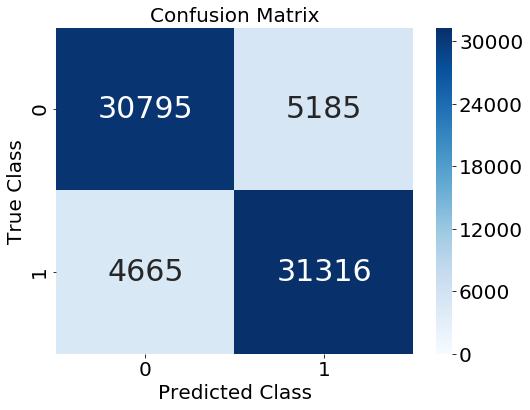

In [39]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_valid, predictions_lgbm_01)
labels = ['0', '1']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

### Hideout Data with Light GBM

In [157]:
#hide_out_preds= clf.predict_proba(X_hideout, num_iteration=clf.best_iteration_)[:, 1]

In [158]:
#predictions_lgbm_02 = np.where(hide_out_preds > 0.5, 1, 0)

In [120]:
#lgb_F1 = f1_score(y_hideout, predictions_lgbm_02, average = 'weighted')
#print("The Light GBM F1 on Hideout Data is", lgb_F1)

The Light GBM F1 on Hideout Data is 0.910379125119576


In [159]:
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y_hideout,sub_preds)

0.8980221441317308

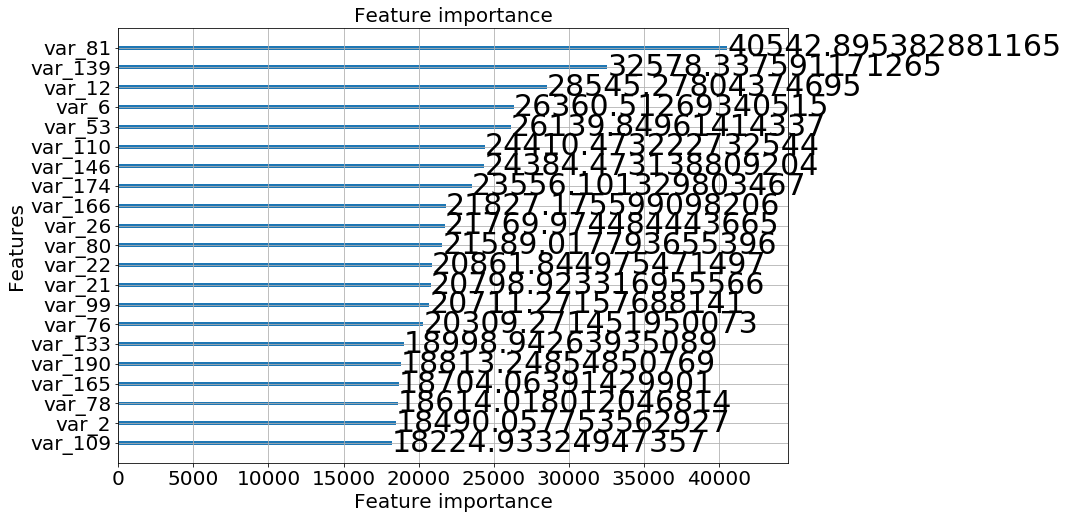

In [386]:
#Plot Variable Importances
#lgb.plot_importance(clf, max_num_features=21, importance_type='gain')

### TEST DATA PREDICTIONS

In [161]:
#X_test=pd.read_csv('test.csv')

In [40]:
X_test.head(2)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760


In [41]:
Index=X_test['ID_code']
X_test=X_test.drop('ID_code', axis=1)

In [397]:
#test_data_preds= clf.predict_proba(X_test, num_iteration=clf.best_iteration_)[:, 1]

In [399]:
#predictions_lgbm_03 = np.where(test_data_preds > 0.5, 1, 0)

In [42]:
submissions=pd.DataFrame({'ID_code':Index, 'target': sub_preds})
# Subpreds from the k-fold iteration above

In [43]:
submissions.shape

(200000, 2)

In [44]:
submissions.head(5)

,ID_code,target
0,test_0,0.422535
1,test_1,0.630170
2,test_2,0.645425
3,test_3,0.670555
4,test_4,0.244902


In [45]:
submissions.to_csv('submissions_lgb_samplingFEtuningbest1.csv', index=False)

## Regularized Random Forest Classifier

In [47]:
#from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [48]:
clf1 = RandomForestClassifier(
    n_estimators=1700,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    max_leaf_nodes=20,
    class_weight='balanced'
)

In [ ]:
param_grid = {"n_estimators": [500, 1000],
              "max_depth": [7],
              "min_samples_split": [2],
              "min_samples_leaf": [1],
              "max_leaf_nodes": [20],
              }

CV_rfc = GridSearchCV(estimator=clf1, param_grid=param_grid, cv= 5, n_jobs=-1, verbose=2)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)

In [49]:
clf1.fit(X_train, y_train)

KeyboardInterrupt: 

In [51]:
preds2 = clf1.predict(X_valid)

In [52]:
from sklearn.metrics import f1_score

RF_F1 = f1_score(y_valid, preds2, average = 'weighted')
print("Regularized RF F1 Score is:", RF_F1)

Regularized RF F1 Score is: 0.7191508595793872


In [53]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid,preds2)

0.7191520883557296

In [54]:
from sklearn.metrics import log_loss

clf_probs = clf1.predict_proba(X_valid)
score = log_loss(y_valid, clf_probs)
print('Log loss for RF Model is:', score)

Log loss for RF Model is: 0.6347238400832141


<Figure size 864x576 with 0 Axes>

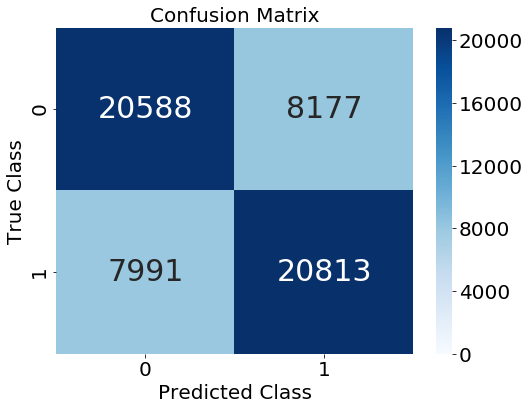

In [55]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_valid, preds2)
labels = ['0', '1']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

### Hideout data

In [56]:
preds3 = clf1.predict(X_hideout)

In [57]:
lgb_F1 = f1_score(y_hideout, preds3, average = 'weighted')
print("The Random Forest F1 on Hideout Data is", lgb_F1)

The Random Forest F1 on Hideout Data is 0.7188183573137967


In [58]:
roc_auc_score(y_hideout,preds3)

0.718829141101489

In [59]:
clf_probs_test = clf1.predict_proba(X_hideout)
score = log_loss(y_hideout, clf_probs_test)
print('Log loss for RF Model is:', score)

Log loss for RF Model is: 0.6350971030043417


<Figure size 864x576 with 0 Axes>

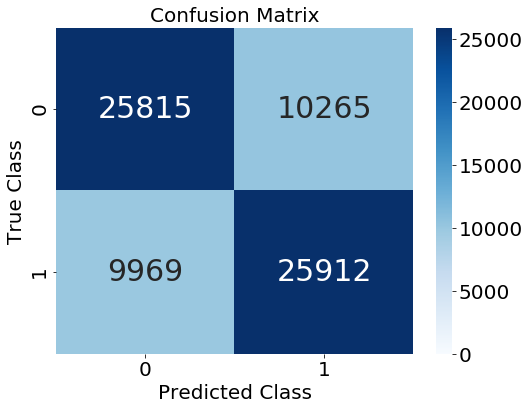

In [60]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_hideout, preds3)
labels = ['0', '1']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

### TEST DATA PREDICTIONS

In [177]:
preds4=clf1.predict(X_test)

In [156]:
submissions_rf=pd.DataFrame({'ID_code':Index, 'target': preds4})

In [190]:
submissions_rf.to_csv('submissions_RF.csv', index=False)

### LIGHT GBM DIFFERENT APPROACH (% 89.7 Leaderboard Score)
#### https://www.kaggle.com/ashishpatel26/imbalance-class-problem-solved-lightgbm

In [ ]:
#train_df=df_sampled1.copy()
#test_df=X_test.copy()

In [46]:
df_sampled2=df_sampled1.drop('ID_code', axis=1)
df_sampled2.head(2)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [509]:
# Display/plot feature importance
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]

    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances.png')

In [513]:
boosting = ["goss","dart"]
def kfold_lightgbm(train_df, test_df, num_folds, stratified = False, boosting = boosting[0]):
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))

    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=326)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=2045)

    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    
    # k-fold
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df, df_sampled["target"])):
        train_x, train_y = train_df.iloc[train_idx], df_sampled["target"].iloc[train_idx]
        valid_x, valid_y = train_df.iloc[valid_idx], df_sampled["target"].iloc[valid_idx]

        # set data structure
        lgb_train = lgb.Dataset(train_x,label=train_y,free_raw_data=False)
        lgb_test = lgb.Dataset(valid_x,label=valid_y,free_raw_data=False)

        # params optimized by optuna
        params ={
                        'task': 'train',
                        'boosting': 'goss',
                        'objective': 'binary',
                        'metric': 'auc',
                        'learning_rate': 0.01,
                        'subsample': 0.8,
                        'max_depth': -1,
                        'top_rate': 0.9064148448434349,
                        'num_leaves': 32,
                        'min_child_weight': 41.9612869171337,
                        'other_rate': 0.0721768246018207,
                        'reg_alpha': 9.677537745007898,
                        'colsample_bytree': 0.5665320670155495,
                        'min_split_gain': 9.820197773625843,
                        'reg_lambda': 8.2532317400459,
                        'min_data_in_leaf': 21,
                        'verbose': -1,
                        'seed':int(2**n_fold),
                        'bagging_seed':int(2**n_fold),
                        'drop_seed':int(2**n_fold)
                        }

        reg = lgb.train(
                        params,
                        lgb_train,
                        valid_sets=[lgb_train, lgb_test],
                        valid_names=['train', 'test'],
                        num_boost_round=7000,early_stopping_rounds= 200,
                        verbose_eval=100,
                        )

        oof_preds[valid_idx] = reg.predict(valid_x, num_iteration=reg.best_iteration)
        sub_preds += reg.predict(test_df, num_iteration=reg.best_iteration) / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = train_x.columns
        fold_importance_df["importance"] = np.log1p(reg.feature_importance(importance_type='gain', iteration=reg.best_iteration))
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d roc_auc_score : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
        del reg, train_x, train_y, valid_x, valid_y
        #gc.collect()

    # display importances
    display_importances(feature_importance_df)
    
        # save submission file
    submission = pd.read_csv("sample_submission.csv")
    submission['target'] = sub_preds
    submission.to_csv(boosting+".csv", index=False)
    display(submission.head())
    return (submission)

Starting LightGBM. Train shape: (359804, 203), test shape: (200000, 203)
Training until validation scores don't improve for 200 rounds.
[100]	train's auc: 0.796632	test's auc: 0.790937
[200]	train's auc: 0.841329	test's auc: 0.835454
[300]	train's auc: 0.865968	test's auc: 0.859087
[400]	train's auc: 0.882528	test's auc: 0.874914
[500]	train's auc: 0.89509	test's auc: 0.886802
[600]	train's auc: 0.904537	test's auc: 0.895719
[700]	train's auc: 0.912095	test's auc: 0.902767
[800]	train's auc: 0.918544	test's auc: 0.908892
[900]	train's auc: 0.923923	test's auc: 0.91398
[1000]	train's auc: 0.928636	test's auc: 0.918446
[1100]	train's auc: 0.932643	test's auc: 0.922201
[1200]	train's auc: 0.936269	test's auc: 0.925596
[1300]	train's auc: 0.939493	test's auc: 0.928671
[1400]	train's auc: 0.942407	test's auc: 0.931411
[1500]	train's auc: 0.945044	test's auc: 0.933872
[1600]	train's auc: 0.947475	test's auc: 0.93619
[1700]	train's auc: 0.949682	test's auc: 0.938281
[1800]	train's auc: 0.9516

[1900]	train's auc: 0.953539	test's auc: 0.942871
[2000]	train's auc: 0.955264	test's auc: 0.944498
[2100]	train's auc: 0.956838	test's auc: 0.945984
[2200]	train's auc: 0.958293	test's auc: 0.947347
[2300]	train's auc: 0.95967	test's auc: 0.948636
[2400]	train's auc: 0.96096	test's auc: 0.949868
[2500]	train's auc: 0.962141	test's auc: 0.951008
[2600]	train's auc: 0.963292	test's auc: 0.952119
[2700]	train's auc: 0.964399	test's auc: 0.95317
[2800]	train's auc: 0.96541	test's auc: 0.954127
[2900]	train's auc: 0.966357	test's auc: 0.955042
[3000]	train's auc: 0.967263	test's auc: 0.95588
[3100]	train's auc: 0.968132	test's auc: 0.956706
[3200]	train's auc: 0.968964	test's auc: 0.95751
[3300]	train's auc: 0.969753	test's auc: 0.958276
[3400]	train's auc: 0.970498	test's auc: 0.95901
[3500]	train's auc: 0.971204	test's auc: 0.959685
[3600]	train's auc: 0.971876	test's auc: 0.960323
[3700]	train's auc: 0.972537	test's auc: 0.960939
[3800]	train's auc: 0.973148	test's auc: 0.961529
[3900]	

,ID_code,target
0,test_0,0.319863
1,test_1,0.613281
2,test_2,0.507880
3,test_3,0.652860
4,test_4,0.232833


,ID_code,target
0,test_0,0.319863
1,test_1,0.613281
2,test_2,0.507880
3,test_3,0.652860
4,test_4,0.232833
5,test_5,0.004123
6,test_6,0.031023
7,test_7,0.479952
8,test_8,0.006091
9,test_9,0.028200


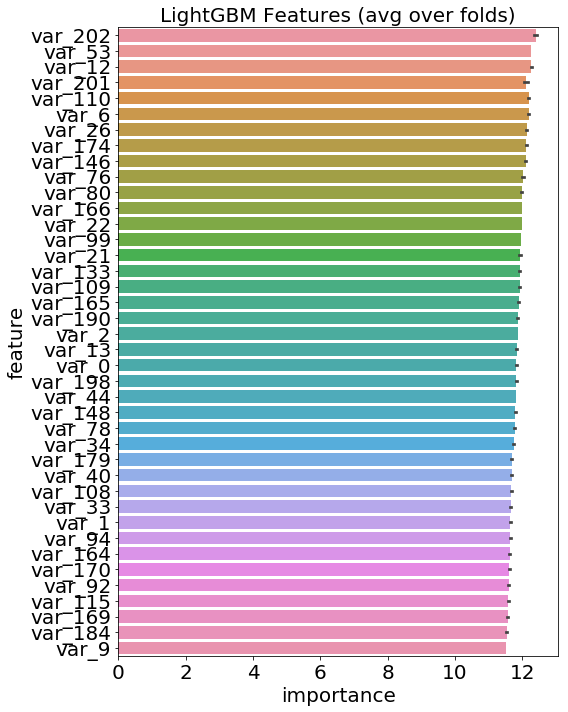

In [571]:
kfold_lightgbm(df_sampled2, X_test, num_folds=5, stratified = True, boosting = boosting[0])

In [539]:
#folds = StratifiedKFold(n_splits= 5, shuffle=True, random_state=326)


In [572]:
%pastebin 509-513

'http://dpaste.com/2ZBGZET'

In [540]:
#folds.n_splits

5

In [515]:
# Save the model
import joblib
#save model
joblib.dump(lgb, 'lgb_train model')

TypeError: can't pickle module objects

### Stochastic Gradient Descent

In [63]:
from sklearn.linear_model import SGDClassifier

In [87]:
clf2 = SGDClassifier(loss="log", penalty="l1", max_iter=5, n_jobs=-1)

In [88]:
clf2.fit(X_train, y_train)

/Users/ismailbozkurt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [116]:
Y_valid_pred_sdg = clf2.predict(X_valid)
Y_hideout_pred_sdg = clf2.predict(X_hideout)
accuracy_score = metrics.accuracy_score(y_hideout, Y_hideout_pred_sdg)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.7416934172676867


In [90]:
print(clf2.score(X_train, y_train))

print(clf2.score(X_valid, y_valid))

0.7465367344989013
0.7449842797338846


In [91]:
roc_auc_score(y_hideout,Y_hideout_pred_sdg)

0.7415363413960572

In [158]:
submission_sgd=clf2.predict(X_test)

# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Try different values for n_neighbors
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [ ]:
print(knn.score(X_train, y_train))

print(knn.score(X_valid, y_valid))

In [ ]:
knn.score(X_hideout, y_hideout)

In [ ]:
Y_valid_pred_knn = knn.predict(X_valid)
Y_hideout_pred_knn = knn.predict(X_hideout)
accuracy_score = metrics.accuracy_score(Y_hideout, Y_hideout_pred_knn)
print("Accuracy_score={}".format(accuracy_score))

In [ ]:
roc_auc_score(y_hideout,Y_hideout_pred_knn)

### BAGGING

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7), 
                            n_estimators=500, max_samples=0.8, max_features=0.8)

bagging.fit(X_train, y_train)

In [ ]:
print(bagging.score(X_train, y_train))

print(bagging.score(X_valid, y_valid))

In [ ]:
Y_valid_pred_bagging = bagging.predict(X_valid)
Y_hideout_pred_bagging=bagging.predict(X_hideout)
accuracy_score = metrics.accuracy_score(y_hideout, Y_test_pred_bagging)
print("Accuracy_score={}".format(accuracy_score))

In [ ]:
roc_auc_score(y_hideout,Y_hideout_pred_bagging)

### XGBOOST (% 84.5 LB SCORE)

In [210]:
import xgboost as xgb

In [244]:
val_preds = np.zeros(X.shape[0])
sub_preds_xgb = np.zeros(X_test.shape[0])
kf = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Create stratified 5 CV data
    X_train, y_train = X.iloc[train_index].copy(), y.iloc[train_index]
    X_valid, y_valid = X.iloc[test_index].copy(), y.iloc[test_index].copy()
    print("\nFold ", i)
    
# Parameters optimized using Bayesian Optimizer Method    
    gbm = xgb.XGBClassifier(
    learning_rate = 0.03450570695385555,
     n_estimators= 147,
     max_delta_step= 2,
     max_depth= 8,
     min_child_weight= 4,
     #gamma=1,
     gamma=0.1331227203252178,                        
     subsample=0.6941640075502717,
     colsample_bylevel= 0.3706219857878677,
     colsample_bytree=0.6142670193823258,
     objective= 'binary:logistic',
     reg_alpha= 1.081049236893711e-05,
     reg_lambda= 1.043686239159047,
     n_jobs= -1,
     scale_pos_weight=0.6941640075502717)
        
    gbm.fit(X_train, y_train, 
                eval_set= [(X_train, y_train),(X_valid, y_valid)], 
                eval_metric='auc', verbose=100, early_stopping_rounds=100
               )
    
    val_preds[test_index] = gbm.predict_proba(X_valid, ntree_limit=gbm.best_ntree_limit)[:, -1]
    sub_preds_xgb += gbm.predict_proba(X_test, ntree_limit=gbm.best_ntree_limit)[:, -1]/kf.n_splits


Fold  0
[0]	validation_0-auc:0.653995	validation_1-auc:0.639385
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.905722	validation_1-auc:0.825506
[146]	validation_0-auc:0.935141	validation_1-auc:0.845718

Fold  1
[0]	validation_0-auc:0.654067	validation_1-auc:0.647109
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.9012	validation_1-auc:0.830502
[146]	validation_0-auc:0.933778	validation_1-auc:0.851999

Fold  2
[0]	validation_0-auc:0.644222	validation_1-auc:0.636921
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[100]	validation_0-auc:0.899685	validation_1-auc:0.833457
[146]	validation_0-auc:0.933674	validation_

In [238]:
val_preds_xgb= gbm.predict(X_valid)

In [242]:
gbm.predict_proba(X_valid)[:,1][:10]

array([0.0474792 , 0.07049153, 0.03577682, 0.03460627, 0.11916415,
       0.06794211, 0.0872825 , 0.03068828, 0.13110352, 0.03192003],
      dtype=float32)

In [ ]:
round

In [230]:
gbm.predict_proba(X_valid)[:10]

array([[0.9525208 , 0.0474792 ],
       [0.92950845, 0.07049153],
       [0.9642232 , 0.03577682],
       [0.9653937 , 0.03460627],
       [0.88083583, 0.11916415],
       [0.93205786, 0.06794211],
       [0.9127175 , 0.0872825 ],
       [0.9693117 , 0.03068828],
       [0.8688965 , 0.13110352],
       [0.96808   , 0.03192003]], dtype=float32)

In [239]:
roc_auc_score(y_valid, val_preds_xgb)

0.50375

In [247]:
preds_xgb = gbm.predict(X_hideout)

In [248]:
roc_auc_score(y_hideout,preds_xgb)

0.9011993679248065

In [249]:
lgb_F1 = f1_score(y_hideout, preds_xgb, average = 'weighted')
print("XGBoost F1 on Hideout Data is", lgb_F1)

XGBoost F1 on Hideout Data is 0.9011590241647224


In [251]:
preds_xgb_test= gbm.predict(X_test)

In [245]:
submissions=pd.DataFrame({'ID_code':Index, 'target': sub_preds_xgb})

In [247]:
submissions.to_csv('submissions_XGB', index=False)
# scored 0.849, 

#### Save the Model

In [255]:
import pickle

In [263]:
import joblib
#save model
joblib.dump(gbm, 'xgboost_model')

['xgboost_model']

In [266]:
#load saved model
xgb = joblib.load('xgboost_model')

## CATBOOST IMPLEMENTATION

### BAYESIAN OPTIMIZATION https://www.kaggle.com/lucamassaron/kaggle-days-paris-gbdt-workshop

In [215]:
import skopt

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.callbacks import DeadlineStopper # Stop the optimization before running out of a fixed budget of time.
from skopt.callbacks import VerboseCallback # Callback to control the verbosity
from skopt.callbacks import DeltaXStopper # Stop the optimization If the last two positions at which the objective has been evaluated are less than delta

from sklearn.metrics import make_scorer
from sklearn.metrics import average_precision_score, roc_auc_score, mean_absolute_error

import pprint


In [216]:
# Reporting util for different optimizers
def report_perf(optimizer, X, y, title, callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    best_score = optimizer.best_score_
    best_score_std = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start, 
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

In [217]:
# Setting a 5-fold stratified cross-validation (note: shuffle=True)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [218]:
# Converting average precision score into a scorer suitable for model selection
avg_prec = make_scorer(average_precision_score, greater_is_better=True, needs_proba=True)

In [630]:
clf = lgb.LGBMClassifier(boosting_type='gbdt',
                         class_weight='balanced',
                         objective='binary',
                         n_jobs=1, 
                         verbose=0)

search_spaces = {
        'learning_rate': Real(0.01, 1.0, 'log-uniform'),
        'num_leaves': Integer(2, 50),
        'max_depth': Integer(0, 20),
        'min_child_samples': Integer(0, 200),
        'max_bin': Integer(100, 100000),
        'subsample': Real(0.01, 1.0, 'uniform'),
        'subsample_freq': Integer(0, 10),
        'colsample_bytree': Real(0.01, 1.0, 'uniform'),
        'min_child_weight': Integer(0, 10),
        'subsample_for_bin': Integer(100000, 500000),
        'reg_lambda': Real(1e-9, 1000, 'log-uniform'),
        'reg_alpha': Real(1e-9, 1.0, 'log-uniform'),
        'scale_pos_weight': Real(1e-6, 500, 'log-uniform'),
        'n_estimators': Integer(500, 2000)        
        }

opt = BayesSearchCV(clf,
                    search_spaces,
                    scoring=avg_prec,
                    cv=skf,
                    n_iter=40,
                    n_jobs=-1,
                    return_train_score=False,
                    refit=True,
                    optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=22)
    
best_params = report_perf(opt, df_sampled2, df_sampled['target'],'LightGBM', 
                          callbacks=[DeltaXStopper(0.001), 
                                     DeadlineStopper(60*5)])
#DeadlineStopper and DeltaXStopper are skopt callbacks that control the total time spent and 
#the improvement of a BayesSearchCV (in our implementation to be called with report_perf, using the parameter callbacks=[]).

LightGBM took 2621.76 seconds,  candidates checked: 1, best CV score: 0.930 ± 0.002
Best parameters:
{'colsample_bytree': 0.3706219857878677,
 'learning_rate': 0.16624226726409647,
 'max_bin': 93400,
 'max_depth': 5,
 'min_child_samples': 22,
 'min_child_weight': 4,
 'n_estimators': 1704,
 'num_leaves': 4,
 'reg_alpha': 1.081049236893711e-05,
 'reg_lambda': 1.043686239159047,
 'scale_pos_weight': 0.19222548462579486,
 'subsample': 0.6941640075502717,
 'subsample_for_bin': 375140,
 'subsample_freq': 7}



In [ ]:
%pastebin 618-622

### Bayesian Optimizing XGBOOST

In [221]:
clf = xgb.XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        silent=1,
        tree_method='approx')

In [222]:
search_spaces = {'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                 'min_child_weight': Integer(0, 10),
                 'max_depth': Integer(1, 20),
                 'max_delta_step': Integer(0, 20),
                 'subsample': Real(0.01, 1.0, 'uniform'),
                 'colsample_bytree': Real(0.01, 1.0, 'uniform'),
                 'colsample_bylevel': Real(0.01, 1.0, 'uniform'),
                 'reg_lambda': Real(1e-9, 1000, 'log-uniform'),
                 'reg_alpha': Real(1e-9, 1.0, 'log-uniform'),
                 'gamma': Real(1e-9, 0.5, 'log-uniform'),
                 'min_child_weight': Integer(0, 5),
                 'n_estimators': Integer(50, 2000),
                 'scale_pos_weight': Real(1e-6, 500, 'log-uniform')}

In [225]:
opt = BayesSearchCV(clf,
                    search_spaces,
                    scoring=avg_prec,
                    cv=skf,
                    n_iter=40,
                    n_jobs=-1,
                    return_train_score=False,
                    refit=True,
                    optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=22)
    
best_params = report_perf(opt, df_sampled2, df_sampled['target'],'XGBoost',                           
                          callbacks=[DeltaXStopper(0.001), 
                                     DeadlineStopper(60*5)])

XGBoost took 3656.76 seconds,  candidates checked: 1, best CV score: 0.931 ± 0.001
Best parameters:
{'colsample_bylevel': 0.3706219857878677,
 'colsample_bytree': 0.6142670193823258,
 'gamma': 0.1331227203252178,
 'learning_rate': 0.03450570695385555,
 'max_delta_step': 2,
 'max_depth': 8,
 'min_child_weight': 4,
 'n_estimators': 147,
 'reg_alpha': 1.081049236893711e-05,
 'reg_lambda': 1.043686239159047,
 'scale_pos_weight': 0.19222548462579486,
 'subsample': 0.6941640075502717}



### STACKING

In [111]:
len(predictions_lgbm_01) ,len(preds2),  len(Y_valid_pred_sdg)

(57569, 57569, 57569)

In [112]:
len(predictions_lgbm_02), len(preds3), len(Y_hideout_pred_sdg)

(71961, 71961, 71961)

In [271]:
Y_valid_pred_all = {"LGBM": predictions_lgbm_01,
                    "rf": preds2,
                    "SGD" : Y_valid_pred_sdg,
                    "XGB": val_preds_xgb
}

Y_valid_pred_stacked = pd.DataFrame(Y_valid_pred_all,
                                    columns=["LGBM","rf","SGD", "XGB"])
Y_hideout_pred_all = {"LGBM": predictions_lgbm_02,
                   "rf": preds3,
                   "SGD" : Y_hideout_pred_sdg,
                    "XGB" : preds_xgb
}

Y_hideout_pred_stacked = pd.DataFrame(Y_hideout_pred_all,
                                   columns=["LGBM","rf", "SGD", "XGB"])

In [272]:
Y_test_pred_all = {"LGBM": predictions_lgbm_03,
                   "rf": preds4,
                   "SGD" : submission_sgd,
                   "XGB" : preds_xgb_test
}

Y_test_pred_stacked = pd.DataFrame(Y_test_pred_all,
                                   columns=["LGBM","rf", "SGD", "XGB"])

In [273]:
from sklearn.ensemble import RandomForestClassifier

meta_classifier = RandomForestClassifier(n_jobs=-1, n_estimators=1000)

meta_classifier.fit(Y_valid_pred_stacked, y_valid)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [274]:
Y_test_pred_stacked_pred=meta_classifier.predict(Y_test_pred_stacked)

In [275]:
meta_classifier.score(Y_valid_pred_stacked, y_valid)

0.9048619916969202

In [276]:
Y_hideout_pred_stacked_pred = meta_classifier.predict(Y_hideout_pred_stacked)
accuracy_score = metrics.accuracy_score(y_hideout, Y_hideout_pred_stacked_pred)
print("Accuracy_score={}".format(accuracy_score))

Accuracy_score=0.9039618682341825


In [277]:
roc_auc_score(y_hideout,Y_hideout_pred_stacked_pred)

0.9039786959616634

In [278]:
Y_hideout_pred_stacked_pred

array([0, 1, 1, ..., 1, 0, 1])

In [279]:
submissions_stacked=pd.DataFrame({'ID_code':Index, 'target': Y_test_pred_stacked_pred})

In [280]:
submissions_stacked.to_csv('submission_stacked.csv',index=False)

In [188]:
submissions_stacked

,ID_code,target
0,test_0,0
1,test_1,1
2,test_2,0
3,test_3,0
4,test_4,0
5,test_5,0
6,test_6,0
7,test_7,0
8,test_8,0
9,test_9,0
